# Words-per Minute

We will do an **experiment** to see how much faster or slower, do we type when we do **blind typing**.

1. We will test our typing with the lights on
2. Then, we'll test again with the lights off

Our **Hypothesis** is that: "people type slower when the lights are off". Is this true? let's find out.

### Data Collection

- Experiment subjects will visit the website: https://monkeytype.com/ to undergo the typing test.
- Each subject will report their own score. Which we will store down below.

### Data Loading

We will use regular Python lists to store the measurements before and after the intervention.

In [7]:
# Experiment Data
scores_1 = [33, 46, 35, 28, 20, 22, 19, 25, 19, 67, 23, 19, 40, 18, 27, 44]
scores_2 = [46, 23, 36, 21, 38, 23, 22, 27, 28, 37, 37, 26, 33, 53, 9, 13]

### Verification

We expect the same participants to undergo the experiment once with the lights on and once with the lights out. 

In [8]:
# Quick Check
assert len(scores_1) == len(scores_2)

### Transformation

In [9]:
# Concatenate
scores = scores_1 + scores_2
scores[:10]

[33, 46, 35, 28, 20, 22, 19, 25, 19, 67]

### Analysis

In [10]:
def my_sum(data):
    s = 0
    for i in scores:
        s += i
    return s

my_sum(scores)

957

In [11]:
def my_average(data):
    return my_sum(data) / len(scores)

my_average(scores)

29.90625

In [12]:
def my_median(data):
    mid_index = len(scores) // 2
    return sorted(data)[mid_index]

my_median(scores)

27

### Enter: `pandas.Series`

In [13]:
import pandas as pd

s = pd.Series(scores, name="wpm")
s[:10]

0    33
1    46
2    35
3    28
4    20
5    22
6    19
7    25
8    19
9    67
Name: wpm, dtype: int64

Statistics:

In [14]:
print("Number of items:", len(s))
print("Sum:", s.sum())
print("Average:", s.mean())
print("Median:", s.median(),)
print("Mode:", s.mode()[0])
print("Standard Deviation:", s.std())

Number of items: 32
Sum: 957
Average: 29.90625
Median: 27.0
Mode: 19
Standard Deviation: 12.32191694083247


But also:

In [15]:
s.nlargest(3)

9     67
29    53
1     46
Name: wpm, dtype: int64

In [16]:
s.nsmallest(3)

30     9
31    13
13    18
Name: wpm, dtype: int64

### Enter: `pandas.DataFrame`

In [ ]:
from pathlib import Path

# Load data from CSV into a DataFrame
file_path = Path("../../data/wpm.csv")
df = pd.read_csv(file_path)

In [29]:
df.head()

,wpm,light
0,11,False
1,15,False
2,50,False
3,13,False
4,15,False


In [ ]:
import pandas as pd
from pathlib import Path

file_path = Path("../../data/wpm.csv")

# df = pd.DataFrame({
#     "wpm": scores_1 + scores_2,
#     "intervention": [False] * len(scores_1) + [True] * len(scores_2)
# })

df = pd.read_csv(file_path)

In [12]:
df.head()

,wpm,intervention
0,33,False
1,46,False
2,35,False
3,28,False
4,20,False


In [12]:
df.tail()

,wpm,intervention
27,26,True
28,33,True
29,53,True
30,9,True
31,13,True


> Aside: you might wonder what is `[False] * len(scores_2)`

In [ ]:
x = [10, 10, 10]
x * 3

[10, 10, 10, 10, 10, 10, 10, 10, 10]

In [ ]:
x = pd.Series([10, 10, 10])
x * 3

0    30
1    30
2    30
dtype: int64

In [ ]:
xs = [True] * len(scores_1) + [False] * len(scores_2)

In [ ]:
# head and tail
xs[:3], xs[-3:]

([True, True, True], [False, False, False])

### Overall statistics

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
wpm,26.0,29.346154,12.013134,10.0,20.25,28.0,40.0,50.0


### Statistics by group

In [31]:
# df.groupby(by='intervention').describe()
df.groupby(by='light').describe()

wpm                                                    
      count       mean        std   min   25%   50%   75%   max
light                                                          
False  13.0  26.153846  13.813316  10.0  15.0  23.0  38.0  50.0
True   13.0  32.538462   9.368523  20.0  24.0  36.0  41.0  46.0

### Visualization: `Seaborn`

<Axes: xlabel='light', ylabel='wpm'>

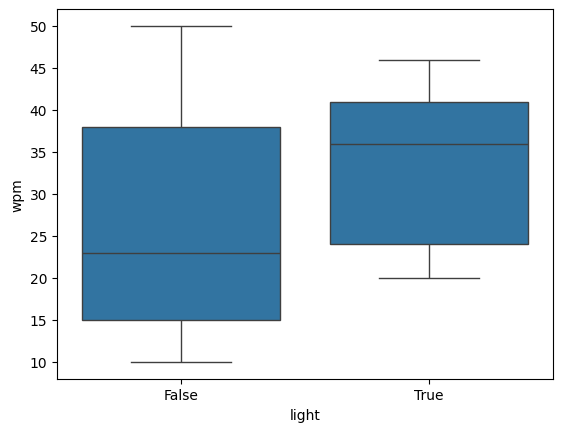

In [33]:
import seaborn as sns

sns.boxplot(
    data=df,
    y='wpm',
    # x='intervention'
    x='light'
)

### Conclusion
